#### 同步的稳定性(延迟)

In [32]:
import os
import sys
sys.path.append(r"../")
import numpy as np
import matplotlib.pyplot as plt
from numba import njit, prange
from import_fun import HH, to_laplacian, delayer

In [33]:
# 连接矩阵，及其特征值
conn = np.array([[0, 1],[1, 0]])
laplacian = to_laplacian(conn)

eigenvalues = np.linalg.eigvals(laplacian)
print(np.sort(eigenvalues))

[0. 2.]


In [34]:
N = 2
dt = 0.01
method = 'euler'    # （"euler", "rk4"）
tau = 7.2

In [35]:
nodes = HH(N=N, method=method)  # , temperature=6.3
nodes.params_nodes["Iex"] = 20.
nodes.vars_nodes.fill(0.)
delayN = int(tau/dt)
delayee = delayer(N, delayN)

In [36]:
gc = 0.01

for i in range(500_00):
    pre_mem = delayee(nodes.vars_nodes[0]) 
    nodes()
     
mem = []
time = []
nodes.t = 0
for i in range(100_00):
    pre_mem = delayee(nodes.vars_nodes[0]) 
    post_mem = nodes.vars_nodes[0]
    vj_vi = pre_mem-post_mem[:, None]     # pre减post
    # 计算突触电流
    Isyn = (gc*conn*vj_vi).sum(axis=1)   # 0维度--post，1维度--pre

    nodes(Isyn)

    mem.append(nodes.vars_nodes[0].copy())
    time.append(nodes.t)

nodes.vars_nodes[0] += 1*np.random.rand(N) 

for i in range(200_00):
    pre_mem = delayee(nodes.vars_nodes[0]) 
    post_mem = nodes.vars_nodes[0]
    vj_vi = pre_mem-post_mem[:, None]     # pre减post
    # 计算突触电流
    Isyn = (gc*conn*vj_vi).sum(axis=1)   # 0维度--post，1维度--pre

    nodes(Isyn)

    mem.append(nodes.vars_nodes[0].copy())
    time.append(nodes.t)



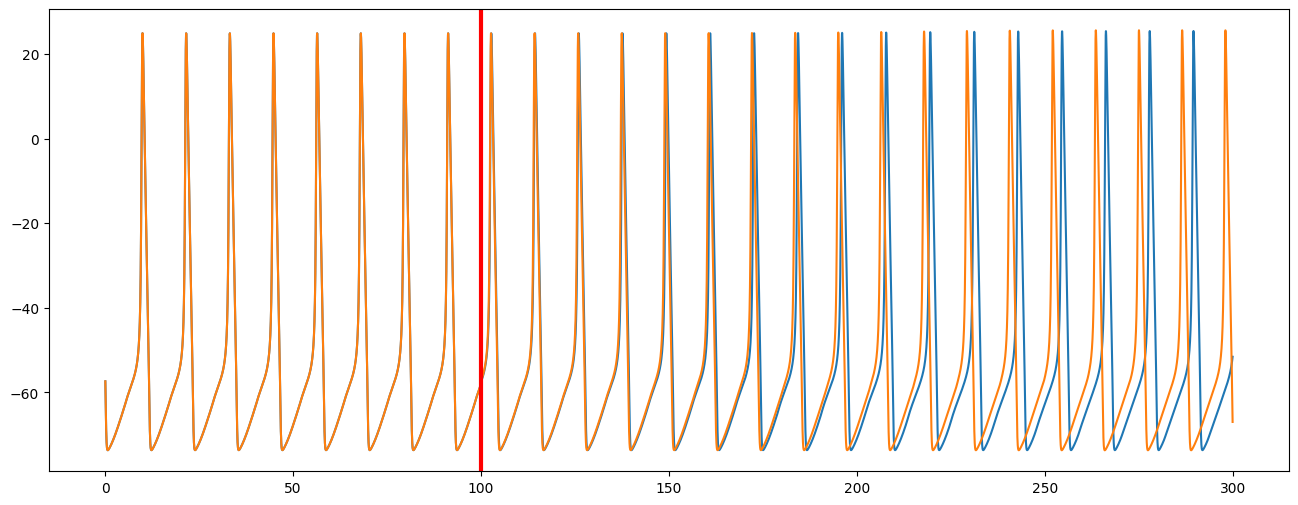

In [37]:
plt.figure(figsize=(16, 6))
plt.plot(time, mem)
plt.axvline(x=100, c="r", linewidth=3)
plt.show()